# Кластеризация ирисов

**Датасет Iris:**
- Id: уникальный идентификатор образца
- SepalLengthCm: длина чашелистика (см)
- SepalWidthCm: ширина чашелистика (см)
- PetalLengthCm: длина лепестка (см)
- PetalWidthCm: ширина лепестка (см)
- Species: вид ириса (Iris-setosa, Iris-versicolor, Iris-virginica)

---

## Установка зависимостей

## 1. Загрузка данных

Загружаем датасет Iris с измерениями ирисов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
import warnings

warnings.filterwarnings('ignore')

# Настройка визуализации
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Загрузка датасета
df = pd.read_csv('Iris.csv')

print("Датасет успешно загружен!")
print(f"Размерность данных: {df.shape}")
df.head()

Датасет успешно загружен!
Размерность данных: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Дескриптивный анализ данных

### 2.1 Общая информация о датасете

In [2]:
# Информация о структуре данных
print("=" * 70)
print("ИНФОРМАЦИЯ О ДАТАСЕТЕ")
print("=" * 70)
print(f"\nРазмерность: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"\nНазвания столбцов: {list(df.columns)}")
print("\n" + "=" * 70)
print("Типы данных:")
print("=" * 70)
print(df.dtypes)

print("\n" + "=" * 70)
print("Информация о пропущенных значениях:")
print("=" * 70)
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nОбщее количество пропусков: {missing_values.sum()}")

print("\n" + "=" * 70)
print("Статистическое описание:")
print("=" * 70)
print(df.describe())

print("\n" + "=" * 70)
print("Проверка на дубликаты:")
print("=" * 70)
print(f"Количество дубликатов: {df.duplicated().sum()}")

ИНФОРМАЦИЯ О ДАТАСЕТЕ

Размерность: 150 строк, 6 столбцов

Названия столбцов: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

Типы данных:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Информация о пропущенных значениях:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Общее количество пропусков: 0

Статистическое описание:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.6000

### 2.2 Визуализация распределения признаков

Анализируем распределение признаков с помощью гистограмм для оценки близости к нормальному распределению

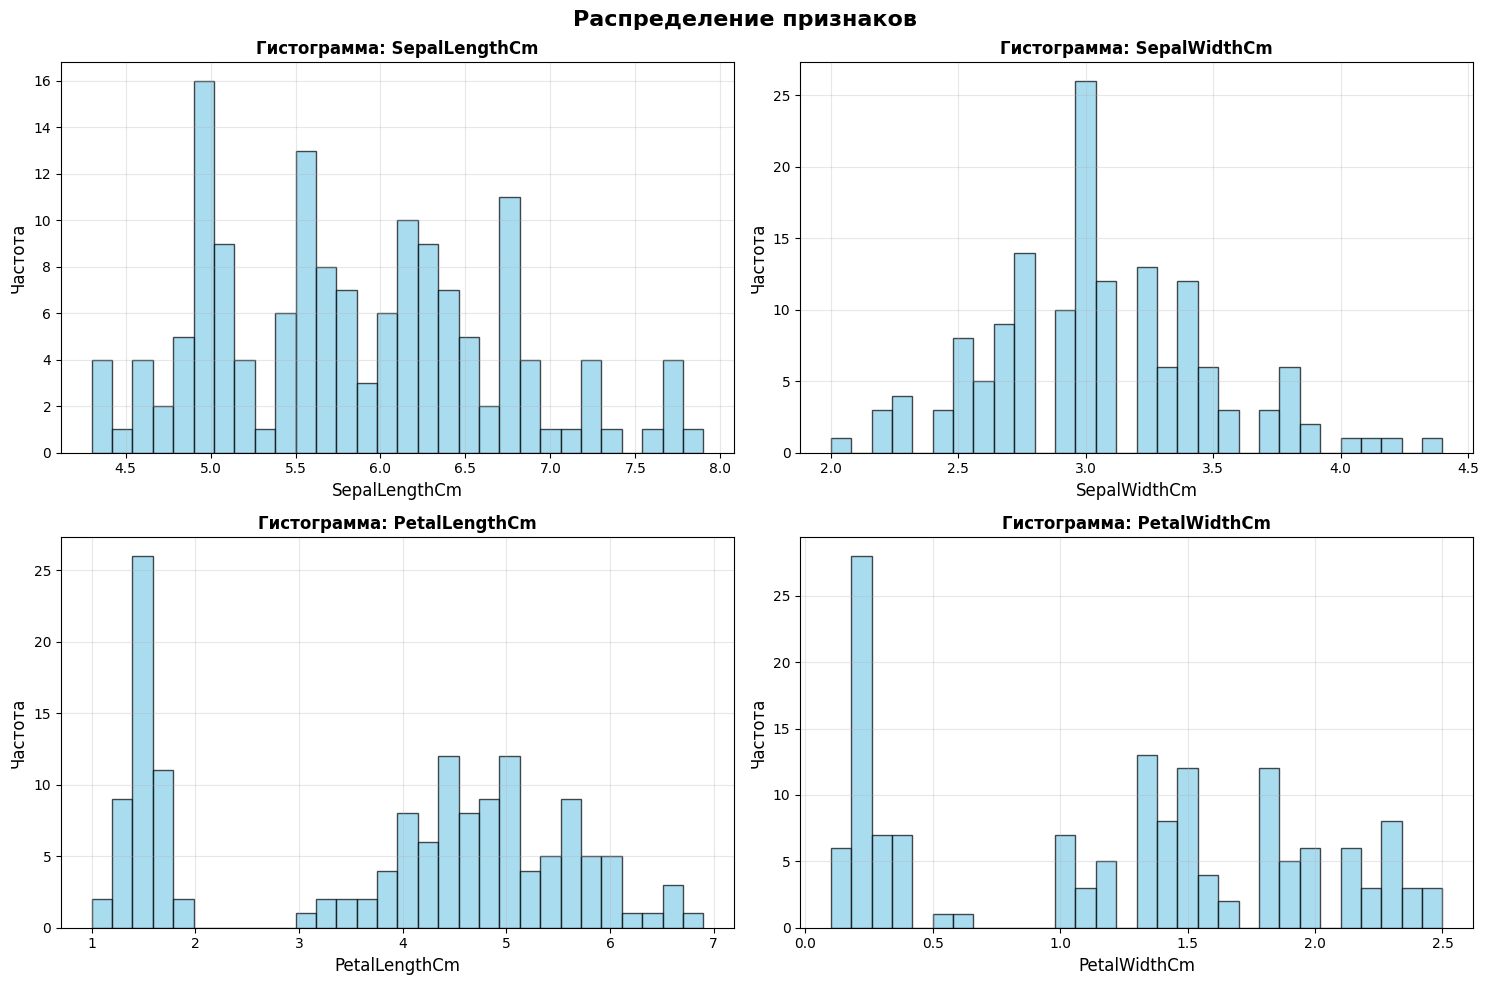

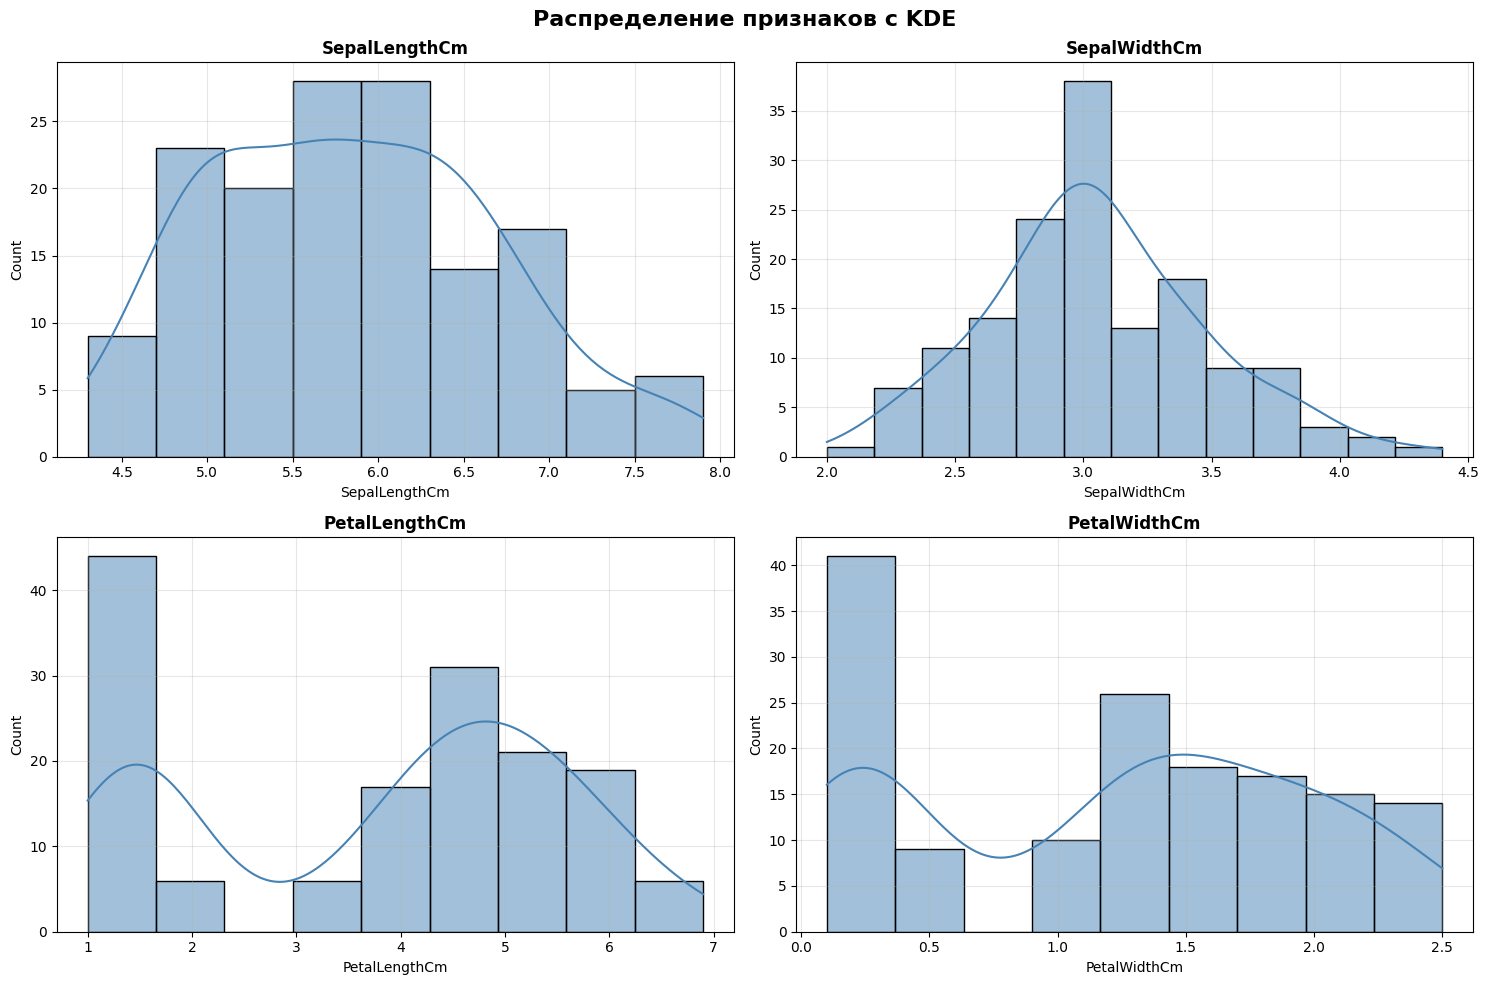

АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПРИЗНАКОВ

SepalLengthCm:
  Асимметрия (Skewness): 0.3149
  Эксцесс (Kurtosis): -0.5521
  → Распределение близко к симметричному

SepalWidthCm:
  Асимметрия (Skewness): 0.3341
  Эксцесс (Kurtosis): 0.2908
  → Распределение близко к симметричному

PetalLengthCm:
  Асимметрия (Skewness): -0.2745
  Эксцесс (Kurtosis): -1.4019
  → Распределение близко к симметричному

PetalWidthCm:
  Асимметрия (Skewness): -0.1050
  Эксцесс (Kurtosis): -1.3398
  → Распределение близко к симметричному


In [3]:
# Подготовка данных для анализа (исключаем Id и Species)
feature_columns = [col for col in df.columns if col not in ['Id', 'Species']]
X = df[feature_columns].copy()

# Визуализация распределения признаков
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Распределение признаков', fontsize=16, fontweight='bold')

# Гистограммы с KDE
for idx, col in enumerate(feature_columns):
    row, col_idx = idx // 2, idx % 2
    ax = axes[row, col_idx]
    
    # Гистограмма
    ax.hist(X[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Частота', fontsize=12)
    ax.set_title(f'Гистограмма: {col}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('photos/distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Более детальный анализ распределения с KDE
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Распределение признаков с KDE', fontsize=16, fontweight='bold')

for idx, col in enumerate(feature_columns):
    row, col_idx = idx // 2, idx % 2
    sns.histplot(data=X, x=col, kde=True, ax=axes[row, col_idx], color='steelblue')
    axes[row, col_idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('photos/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Статистика по распределению
print("=" * 70)
print("АНАЛИЗ РАСПРЕДЕЛЕНИЯ ПРИЗНАКОВ")
print("=" * 70)
for col in feature_columns:
    skewness = X[col].skew()
    kurtosis = X[col].kurtosis()
    print(f"\n{col}:")
    print(f"  Асимметрия (Skewness): {skewness:.4f}")
    print(f"  Эксцесс (Kurtosis): {kurtosis:.4f}")
    if abs(skewness) < 0.5:
        print(f"  → Распределение близко к симметричному")
    elif skewness > 0:
        print(f"  → Правосторонняя асимметрия")
    else:
        print(f"  → Левосторонняя асимметрия")

### 2.3 Анализ выбросов

Проверяем наличие выбросов с помощью box plots и метода межквартильного размаха (IQR)

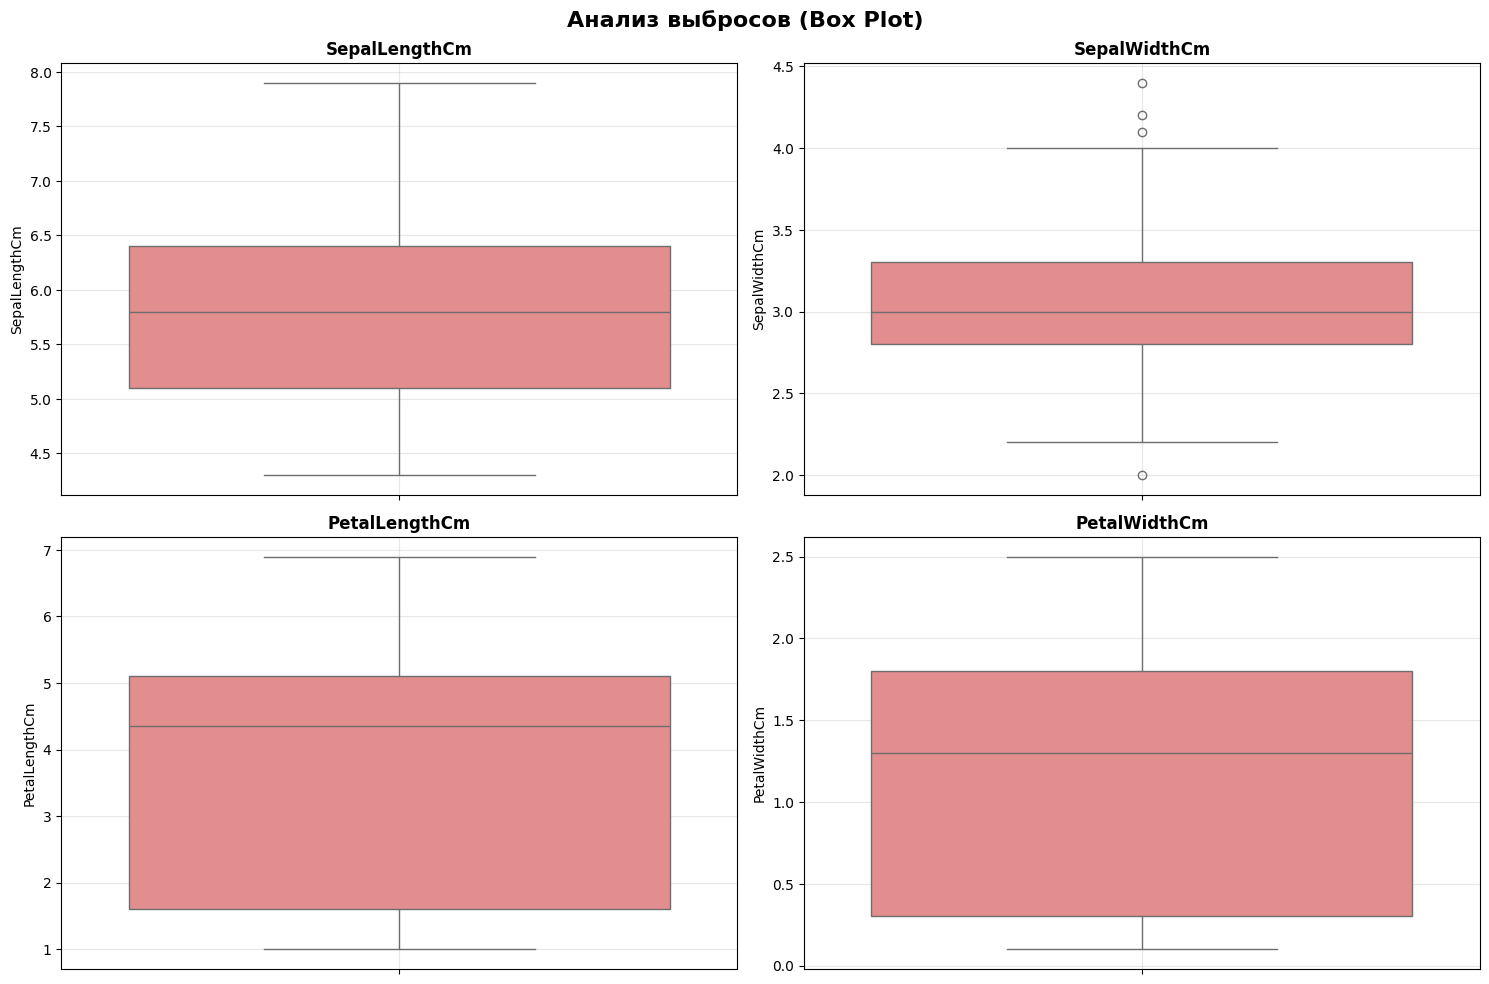

АНАЛИЗ ВЫБРОСОВ (метод IQR)

SepalLengthCm:
  Нижняя граница: 3.15
  Верхняя граница: 8.35
  Количество выбросов: 0 (0.00%)

SepalWidthCm:
  Нижняя граница: 2.05
  Верхняя граница: 4.05
  Количество выбросов: 4 (2.67%)

PetalLengthCm:
  Нижняя граница: -3.65
  Верхняя граница: 10.35
  Количество выбросов: 0 (0.00%)

PetalWidthCm:
  Нижняя граница: -1.95
  Верхняя граница: 4.05
  Количество выбросов: 0 (0.00%)

ВЫВОД ПО ВЫБРОСАМ:
⚠ Обнаружено 4 выбросов
Рекомендуется либо удалить выбросы, либо использовать робастные методы кластеризации


In [4]:
# Boxplot для визуализации выбросов
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Анализ выбросов (Box Plot)', fontsize=16, fontweight='bold')

for idx, col in enumerate(feature_columns):
    row, col_idx = idx // 2, idx % 2
    sns.boxplot(y=X[col], ax=axes[row, col_idx], color='lightcoral')
    axes[row, col_idx].set_title(f'{col}', fontsize=12, fontweight='bold')
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('photos/outliers_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Количественный анализ выбросов методом IQR
print("=" * 70)
print("АНАЛИЗ ВЫБРОСОВ (метод IQR)")
print("=" * 70)

outliers_info = {}
for col in feature_columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)]
    outliers_count = len(outliers)
    outliers_percent = (outliers_count / len(X)) * 100
    
    outliers_info[col] = {
        'count': outliers_count,
        'percent': outliers_percent,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }
    
    print(f"\n{col}:")
    print(f"  Нижняя граница: {lower_bound:.2f}")
    print(f"  Верхняя граница: {upper_bound:.2f}")
    print(f"  Количество выбросов: {outliers_count} ({outliers_percent:.2f}%)")

print("\n" + "=" * 70)
print("ВЫВОД ПО ВЫБРОСАМ:")
print("=" * 70)
total_outliers = sum([info['count'] for info in outliers_info.values()])
if total_outliers == 0:
    print("✓ Выбросы отсутствуют - данные подходят для кластеризации")
else:
    print(f"⚠ Обнаружено {total_outliers} выбросов")
    print("Рекомендуется либо удалить выбросы, либо использовать робастные методы кластеризации")

### 2.4 Корреляционный анализ

Оцениваем взаимосвязь между признаками для понимания структуры данных

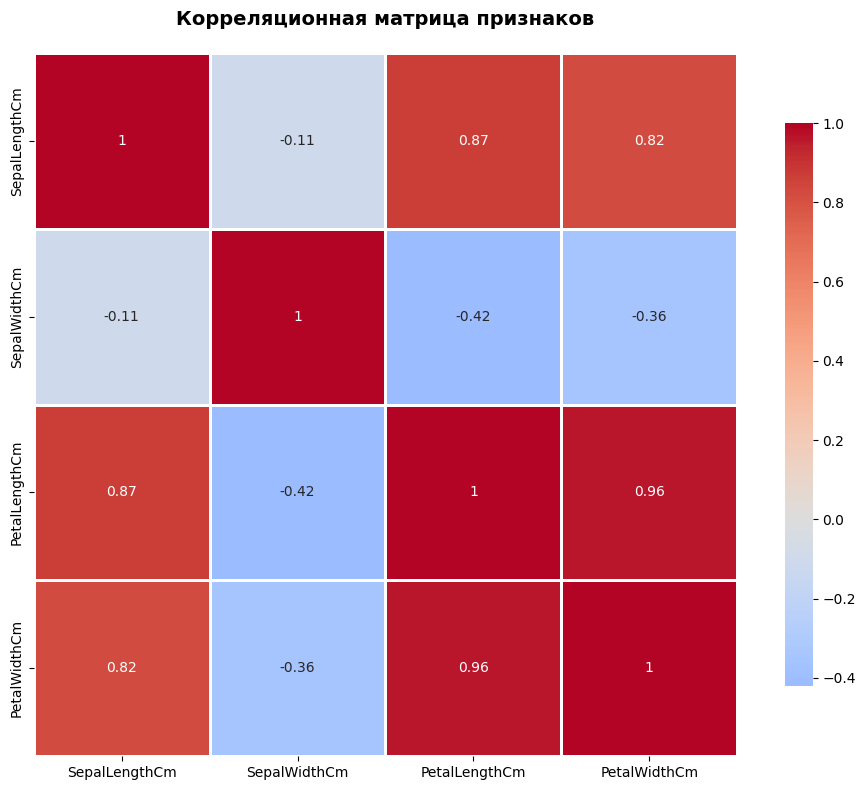

КОРРЕЛЯЦИОННЫЙ АНАЛИЗ
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

ИНТЕРПРЕТАЦИЯ:

SepalLengthCm ↔ SepalWidthCm: -0.1094
  → Слабая корреляция

SepalLengthCm ↔ PetalLengthCm: 0.8718
  → Сильная корреляция

SepalLengthCm ↔ PetalWidthCm: 0.8180
  → Сильная корреляция

SepalWidthCm ↔ PetalLengthCm: -0.4205
  → Умеренная корреляция

SepalWidthCm ↔ PetalWidthCm: -0.3565
  → Слабая корреляция

PetalLengthCm ↔ PetalWidthCm: 0.9628
  → Сильная корреляция


In [5]:
# Корреляционная матрица
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Корреляционная матрица признаков', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('photos/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("=" * 70)
print("КОРРЕЛЯЦИОННЫЙ АНАЛИЗ")
print("=" * 70)
print(correlation_matrix)
print("\n" + "=" * 70)
print("ИНТЕРПРЕТАЦИЯ:")
print("=" * 70)
for i in range(len(feature_columns)):
    for j in range(i+1, len(feature_columns)):
        corr = correlation_matrix.iloc[i, j]
        col1, col2 = feature_columns[i], feature_columns[j]
        print(f"\n{col1} ↔ {col2}: {corr:.4f}")
        if abs(corr) > 0.7:
            print(f"  → Сильная корреляция")
        elif abs(corr) > 0.4:
            print(f"  → Умеренная корреляция")
        else:
            print(f"  → Слабая корреляция")

## 3. Предобработка данных

### 3.1 Обоснование выбора метода масштабирования

**Анализ данных показал:**
- Признаки имеют разные масштабы и диапазоны значений
- SepalLengthCm, SepalWidthCm, PetalLengthCm и PetalWidthCm находятся в разных диапазонах
- Для методов, основанных на расстояниях (K-means, DBSCAN), масштабирование критически важно

**Выбор метода масштабирования:**

1. **StandardScaler (Z-score нормализация)** - приводит данные к нормальному распределению с μ=0 и σ=1
   - ✓ Подходит для K-means (чувствителен к масштабу)
   - ✓ Хорошо работает при наличии выбросов
   - ✓ Не ограничивает значения фиксированным диапазоном

2. **MinMaxScaler** - масштабирует в диапазон [0, 1]
   - ✓ Сохраняет форму распределения
   - ✓ Удобен для интерпретации
   - ⚠ Чувствителен к выбросам

**Решение:** Будем использовать **StandardScaler**, так как он более устойчив к выбросам и лучше подходит для методов кластеризации на основе расстояний.

РЕЗУЛЬТАТЫ СТАНДАРТИЗАЦИИ

Исходные данные:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

Стандартизированные данные:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   1.500000e+02  1.500000e+02   1.500000e+02  1.500000e+02
mean   -4.736952e-16 -6.631732e-16   3.315866e-16 -2.842171e-16
std     1.003350e+00  1.003350e+00   1.003350e+00  1.003350e+00
min    -1.870024e+00 -2.438987e+00  -1.568735e+00 -1.444450e+00
25%    -9.006812e-01 -5.877635e

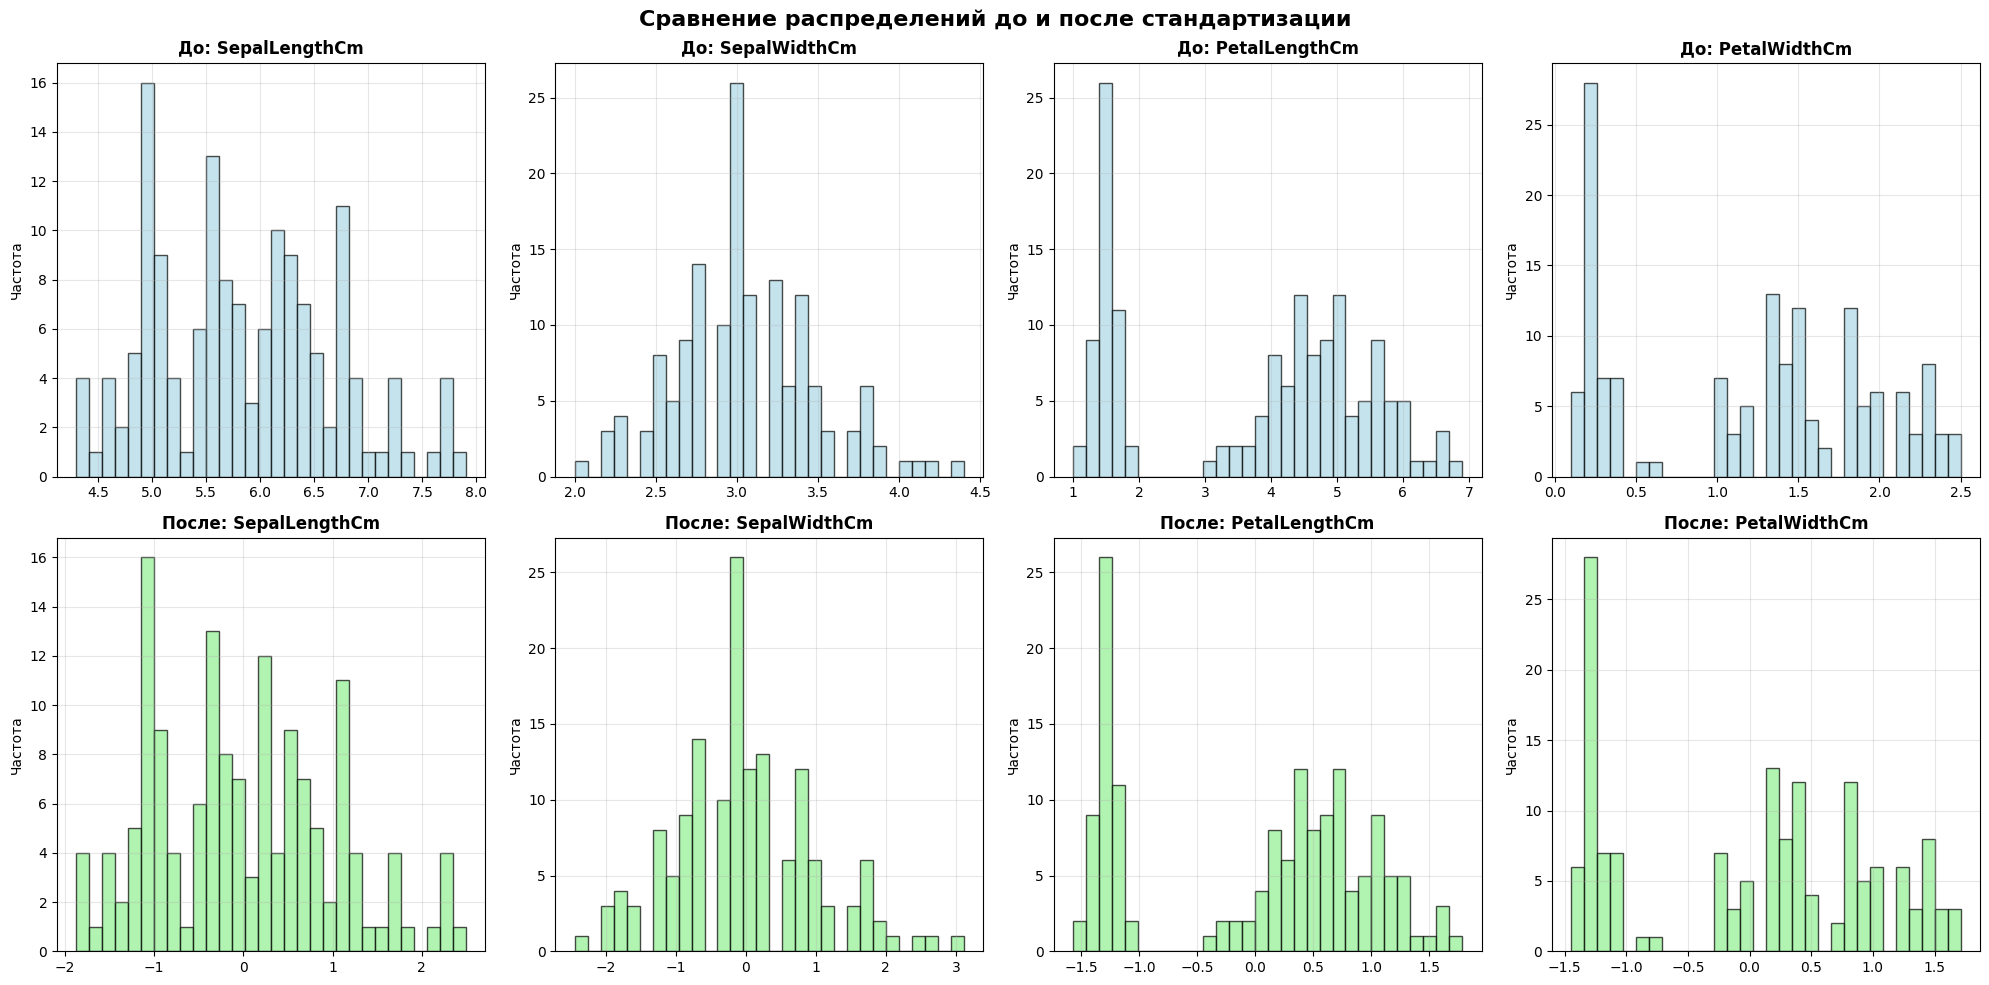

PCA ПРЕОБРАЗОВАНИЕ ДЛЯ ВИЗУАЛИЗАЦИИ
Объясненная дисперсия по компонентам: [0.72770452 0.23030523]
Суммарная объясненная дисперсия: 0.9580

Вклад признаков в первую главную компоненту:
  SepalLengthCm: 0.5224
  SepalWidthCm: -0.2634
  PetalLengthCm: 0.5813
  PetalWidthCm: 0.5656

Вклад признаков во вторую главную компоненту:
  SepalLengthCm: 0.3723
  SepalWidthCm: 0.9256
  PetalLengthCm: 0.0211
  PetalWidthCm: 0.0654


In [6]:
# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)

print("=" * 70)
print("РЕЗУЛЬТАТЫ СТАНДАРТИЗАЦИИ")
print("=" * 70)
print("\nИсходные данные:")
print(X.describe())
print("\n" + "=" * 70)
print("Стандартизированные данные:")
print("=" * 70)
print(X_scaled_df.describe())

# Визуализация до и после масштабирования
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Сравнение распределений до и после стандартизации', fontsize=16, fontweight='bold')

for idx, col in enumerate(feature_columns):
    # До стандартизации
    axes[0, idx].hist(X[col], bins=30, alpha=0.7, color='lightblue', edgecolor='black')
    axes[0, idx].set_title(f'До: {col}', fontsize=12, fontweight='bold')
    axes[0, idx].set_ylabel('Частота', fontsize=10)
    axes[0, idx].grid(True, alpha=0.3)
    
    # После стандартизации
    axes[1, idx].hist(X_scaled_df[col], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, idx].set_title(f'После: {col}', fontsize=12, fontweight='bold')
    axes[1, idx].set_ylabel('Частота', fontsize=10)
    axes[1, idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('photos/scaling_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Применение PCA для визуализации (4 признака -> 2 компоненты)
# Это будет использоваться для визуализации кластеров
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("=" * 70)
print("PCA ПРЕОБРАЗОВАНИЕ ДЛЯ ВИЗУАЛИЗАЦИИ")
print("=" * 70)
print(f"Объясненная дисперсия по компонентам: {pca.explained_variance_ratio_}")
print(f"Суммарная объясненная дисперсия: {sum(pca.explained_variance_ratio_):.4f}")
print(f"\nВклад признаков в первую главную компоненту:")
for i, col in enumerate(feature_columns):
    print(f"  {col}: {pca.components_[0, i]:.4f}")
print(f"\nВклад признаков во вторую главную компоненту:")
for i, col in enumerate(feature_columns):
    print(f"  {col}: {pca.components_[1, i]:.4f}")

### 3.2 Визуальная оценка структуры данных

Построим матрицу диаграмм рассеивания (scatter plot matrix) для визуальной оценки кластерной структуры

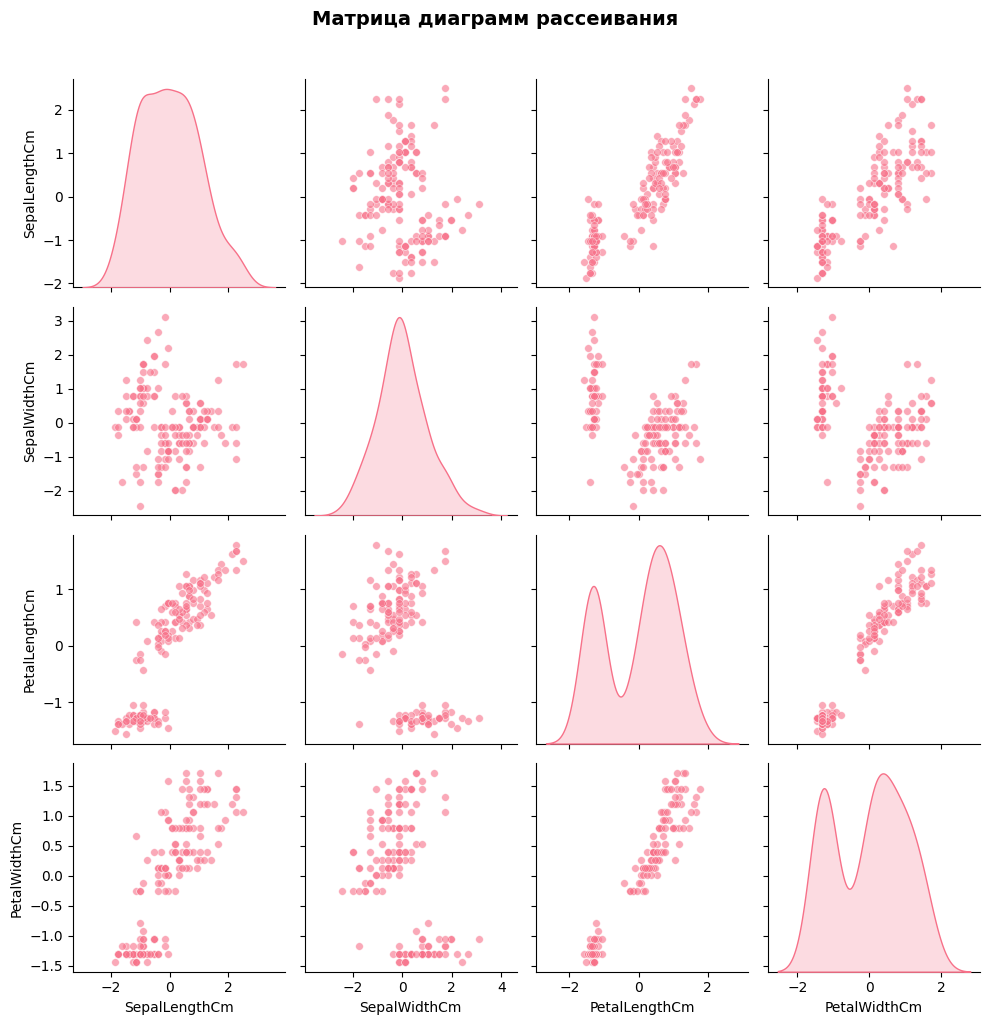

ВИЗУАЛЬНЫЙ АНАЛИЗ СТРУКТУРЫ ДАННЫХ

На основе диаграмм рассеивания можно сделать следующие выводы:

1. ФОРМА КЛАСТЕРОВ:
   - Данные могут образовывать сферические/эллиптические кластеры
   - Это делает K-means подходящим методом

2. КОЛИЧЕСТВО КЛАСТЕРОВ:
   - Визуально можно предположить наличие 2-4 кластеров
   - Точное количество будет определено методом локтя и силуэтным анализом

3. ПЛОТНОСТЬ:
   - Кластеры могут иметь разную плотность
   - DBSCAN будет полезен для выявления кластеров переменной плотности

4. ВЫБОР МЕТОДОВ:
   ✓ K-means - для выявления сферических кластеров
   ✓ DBSCAN - для работы с кластерами переменной плотности и выявления шума



In [7]:
# Pair plot для более детального анализа
X_scaled_plot = X_scaled_df.copy()
sns.pairplot(X_scaled_plot, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30})
plt.suptitle('Матрица диаграмм рассеивания', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('photos/pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("=" * 70)
print("ВИЗУАЛЬНЫЙ АНАЛИЗ СТРУКТУРЫ ДАННЫХ")
print("=" * 70)
print("""
На основе диаграмм рассеивания можно сделать следующие выводы:

1. ФОРМА КЛАСТЕРОВ:
   - Данные могут образовывать сферические/эллиптические кластеры
   - Это делает K-means подходящим методом

2. КОЛИЧЕСТВО КЛАСТЕРОВ:
   - Визуально можно предположить наличие 2-4 кластеров
   - Точное количество будет определено методом локтя и силуэтным анализом

3. ПЛОТНОСТЬ:
   - Кластеры могут иметь разную плотность
   - DBSCAN будет полезен для выявления кластеров переменной плотности

4. ВЫБОР МЕТОДОВ:
   ✓ K-means - для выявления сферических кластеров
   ✓ DBSCAN - для работы с кластерами переменной плотности и выявления шума
""")

## 4. Подбор оптимального количества кластеров

### 4.1 Метод локтя (Elbow Method)

Определяем оптимальное количество кластеров для K-means по показателю инерции (суммы квадратов расстояний до центров кластеров)

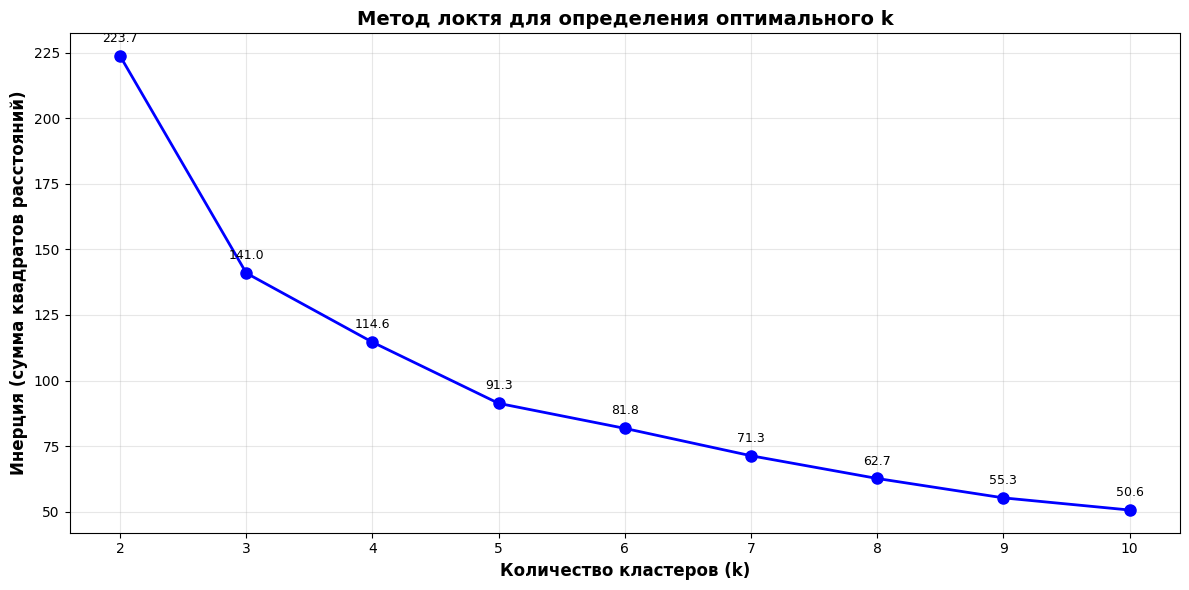

АНАЛИЗ МЕТОДА ЛОКТЯ

Инерция для разных значений k:
k=2: 223.73
k=3: 140.97
k=4: 114.62
k=5: 91.30
k=6: 81.76
k=7: 71.32
k=8: 62.65
k=9: 55.26
k=10: 50.62

Вторая производная (для определения локтя):
k=3: 56.42
k=4: 3.03
k=5: 13.78
k=6: -0.90
k=7: 1.77
k=8: 1.28
k=9: 2.75

Оптимальное k по методу локтя: 7


In [8]:
# Метод локтя
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(12, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Количество кластеров (k)', fontsize=12, fontweight='bold')
plt.ylabel('Инерция (сумма квадратов расстояний)', fontsize=12, fontweight='bold')
plt.title('Метод локтя для определения оптимального k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

# Добавляем аннотации
for i, (k, inertia) in enumerate(zip(K_range, inertias)):
    plt.annotate(f'{inertia:.1f}', (k, inertia), textcoords="offset points", 
                 xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('photos/elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()

# Вычисление второй производной для определения "локтя"
diff1 = np.diff(inertias)
diff2 = np.diff(diff1)

print("=" * 70)
print("АНАЛИЗ МЕТОДА ЛОКТЯ")
print("=" * 70)
print(f"\nИнерция для разных значений k:")
for k, inertia in zip(K_range, inertias):
    print(f"k={k}: {inertia:.2f}")

print(f"\nВторая производная (для определения локтя):")
for i, (k, d2) in enumerate(zip(range(3, 10), diff2)):
    print(f"k={k}: {d2:.2f}")

optimal_k_elbow = list(K_range)[np.argmin(diff2) + 2]
print(f"\n{'=' * 70}")
print(f"Оптимальное k по методу локтя: {optimal_k_elbow}")
print(f"{'=' * 70}")

### 4.2 Силуэтный анализ (Silhouette Analysis)

Оцениваем качество кластеризации с помощью коэффициента силуэта

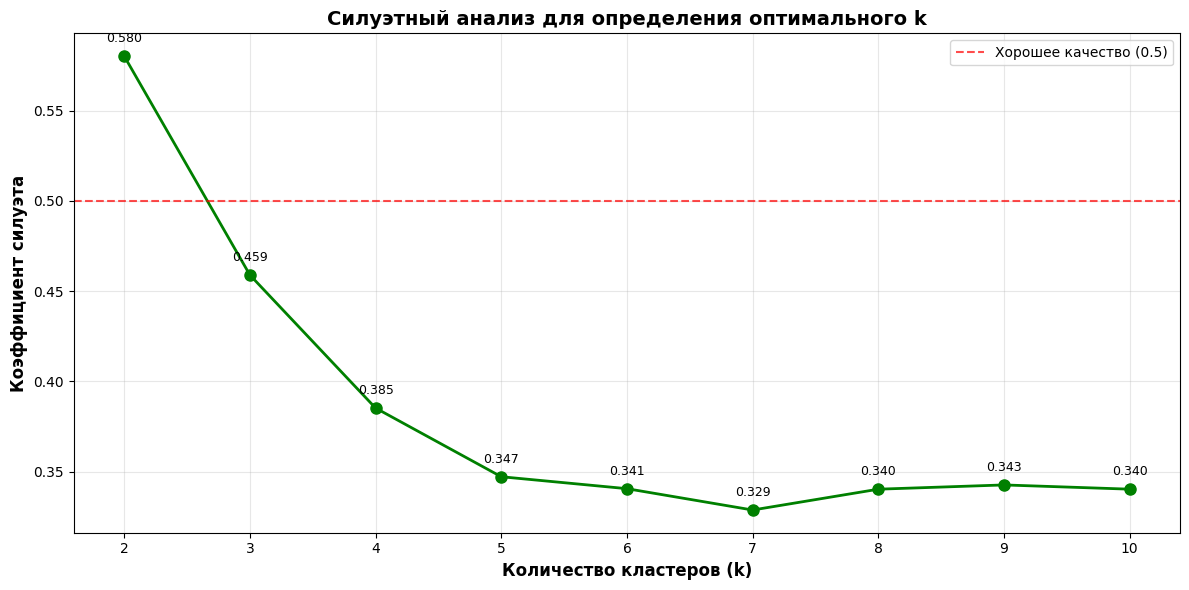

СИЛУЭТНЫЙ АНАЛИЗ

Коэффициенты силуэта для разных значений k:
k=2: 0.5802 (Хорошо)
k=3: 0.4590 (Приемлемо)
k=4: 0.3853 (Приемлемо)
k=5: 0.3473 (Приемлемо)
k=6: 0.3407 (Приемлемо)
k=7: 0.3288 (Приемлемо)
k=8: 0.3404 (Приемлемо)
k=9: 0.3427 (Приемлемо)
k=10: 0.3404 (Приемлемо)

Оптимальное k по силуэтному анализу: 2
Максимальный коэффициент силуэта: 0.5802

ИТОГОВАЯ РЕКОМЕНДАЦИЯ
Метод локтя рекомендует: k=7
Силуэтный анализ рекомендует: k=2

ВЫБРАННОЕ ОПТИМАЛЬНОЕ ЗНАЧЕНИЕ: k=2


In [9]:
# Силуэтный анализ
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Визуализация коэффициентов силуэта
plt.figure(figsize=(12, 6))
plt.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Количество кластеров (k)', fontsize=12, fontweight='bold')
plt.ylabel('Коэффициент силуэта', fontsize=12, fontweight='bold')
plt.title('Силуэтный анализ для определения оптимального k', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.axhline(y=0.5, color='r', linestyle='--', label='Хорошее качество (0.5)', alpha=0.7)

# Добавляем аннотации
for k, score in zip(K_range, silhouette_scores):
    plt.annotate(f'{score:.3f}', (k, score), textcoords="offset points", 
                 xytext=(0,10), ha='center', fontsize=9)

plt.legend()
plt.tight_layout()
plt.savefig('photos/silhouette_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("=" * 70)
print("СИЛУЭТНЫЙ АНАЛИЗ")
print("=" * 70)
print(f"\nКоэффициенты силуэта для разных значений k:")
for k, score in zip(K_range, silhouette_scores):
    quality = "Отлично" if score > 0.7 else "Хорошо" if score > 0.5 else "Приемлемо" if score > 0.25 else "Плохо"
    print(f"k={k}: {score:.4f} ({quality})")

optimal_k_silhouette = list(K_range)[np.argmax(silhouette_scores)]
print(f"\n{'=' * 70}")
print(f"Оптимальное k по силуэтному анализу: {optimal_k_silhouette}")
print(f"Максимальный коэффициент силуэта: {max(silhouette_scores):.4f}")
print(f"{'=' * 70}")

print(f"\n{'=' * 70}")
print("ИТОГОВАЯ РЕКОМЕНДАЦИЯ")
print(f"{'=' * 70}")
print(f"Метод локтя рекомендует: k={optimal_k_elbow}")
print(f"Силуэтный анализ рекомендует: k={optimal_k_silhouette}")
optimal_k = optimal_k_silhouette  # Предпочитаем силуэтный анализ
print(f"\nВЫБРАННОЕ ОПТИМАЛЬНОЕ ЗНАЧЕНИЕ: k={optimal_k}")
print(f"{'=' * 70}")

## 5. Кластеризация методом K-means

### 5.1 Реализация K-means с оптимальным k

**Обоснование выбора K-means:**
- Данные имеют сферическую/эллиптическую структуру
- Все признаки стандартизированы (важно для методов на основе расстояний)
- K-means эффективен для данных с четкими границами кластеров
- Метод интерпретируем через центроиды кластеров

In [10]:
# Применение K-means с оптимальным k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_centers = kmeans.cluster_centers_

# Добавление меток кластеров в датафрейм
df_kmeans = df.copy()
df_kmeans['Cluster_KMeans'] = kmeans_labels

print("=" * 70)
print(f"K-MEANS КЛАСТЕРИЗАЦИЯ (k={optimal_k})")
print("=" * 70)
print(f"\nРаспределение объектов по кластерам:")
print(df_kmeans['Cluster_KMeans'].value_counts().sort_index())
print(f"\nПроцентное распределение:")
print(df_kmeans['Cluster_KMeans'].value_counts(normalize=True).sort_index() * 100)

# Центры кластеров (в стандартизированном пространстве)
print(f"\n{'=' * 70}")
print("ЦЕНТРЫ КЛАСТЕРОВ (стандартизированные значения)")
print(f"{'=' * 70}")
centers_df = pd.DataFrame(kmeans_centers, columns=feature_columns)
print(centers_df)

# Обратное преобразование центров для интерпретации
centers_original = scaler.inverse_transform(kmeans_centers)
centers_original_df = pd.DataFrame(centers_original, columns=feature_columns)

print(f"\n{'=' * 70}")
print("ЦЕНТРЫ КЛАСТЕРОВ (исходные значения)")
print(f"{'=' * 70}")
print(centers_original_df)

# Статистика по кластерам
print(f"\n{'=' * 70}")
print("СТАТИСТИКА ПО КЛАСТЕРАМ")
print(f"{'=' * 70}")
for cluster in range(optimal_k):
    cluster_data = df_kmeans[df_kmeans['Cluster_KMeans'] == cluster][feature_columns]
    print(f"\nКластер {cluster}:")
    print(f"  Размер: {len(cluster_data)} объектов")
    print(f"  Средние значения:")
    for col in feature_columns:
        print(f"    {col}: {cluster_data[col].mean():.2f}")

K-MEANS КЛАСТЕРИЗАЦИЯ (k=2)

Распределение объектов по кластерам:
Cluster_KMeans
0    100
1     50
Name: count, dtype: int64

Процентное распределение:
Cluster_KMeans
0    66.666667
1    33.333333
Name: proportion, dtype: float64

ЦЕНТРЫ КЛАСТЕРОВ (стандартизированные значения)
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       0.507289     -0.421153       0.652439      0.627564
1      -1.014579      0.842307      -1.304878     -1.255129

ЦЕНТРЫ КЛАСТЕРОВ (исходные значения)
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0          6.262         2.872          4.906         1.676
1          5.006         3.418          1.464         0.244

СТАТИСТИКА ПО КЛАСТЕРАМ

Кластер 0:
  Размер: 100 объектов
  Средние значения:
    SepalLengthCm: 6.26
    SepalWidthCm: 2.87
    PetalLengthCm: 4.91
    PetalWidthCm: 1.68

Кластер 1:
  Размер: 50 объектов
  Средние значения:
    SepalLengthCm: 5.01
    SepalWidthCm: 3.42
    PetalLengthCm: 1.46
    PetalWidthCm: 0.24


### 5.2 Метрики качества K-means

In [11]:
# Внутренние метрики качества K-means
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(X_scaled, kmeans_labels)
kmeans_davies = davies_bouldin_score(X_scaled, kmeans_labels)
kmeans_inertia = kmeans.inertia_

# Расчет внутрикластерных расстояний
distances_to_centers = []
for i, label in enumerate(kmeans_labels):
    center = kmeans_centers[label]
    distance = np.linalg.norm(X_scaled[i] - center)
    distances_to_centers.append(distance)

avg_intra_cluster_distance = np.mean(distances_to_centers)

# Расчет межкластерных расстояний
inter_cluster_distances = []
for i in range(optimal_k):
    for j in range(i+1, optimal_k):
        dist = np.linalg.norm(kmeans_centers[i] - kmeans_centers[j])
        inter_cluster_distances.append(dist)

avg_inter_cluster_distance = np.mean(inter_cluster_distances)

print("=" * 70)
print("МЕТРИКИ КАЧЕСТВА K-MEANS")
print("=" * 70)

print("\n1. ВНУТРЕННИЕ МЕТРИКИ:")
print(f"   • Silhouette Score: {kmeans_silhouette:.4f}")
print(f"     (чем ближе к 1, тем лучше; >0.5 - хорошо)")
print(f"   • Calinski-Harabasz Index: {kmeans_calinski:.2f}")
print(f"     (чем выше, тем лучше)")
print(f"   • Davies-Bouldin Index: {kmeans_davies:.4f}")
print(f"     (чем ниже, тем лучше; <1 - хорошо)")
print(f"   • Inertia (SSE): {kmeans_inertia:.2f}")
print(f"     (сумма квадратов расстояний до центров)")

print("\n2. РАССТОЯНИЯ:")
print(f"   • Среднее внутрикластерное расстояние: {avg_intra_cluster_distance:.4f}")
print(f"     (чем меньше, тем компактнее кластеры)")
print(f"   • Среднее межкластерное расстояние: {avg_inter_cluster_distance:.4f}")
print(f"     (чем больше, тем лучше разделены кластеры)")
print(f"   • Соотношение: {avg_inter_cluster_distance/avg_intra_cluster_distance:.4f}")
print(f"     (чем больше, тем лучше)")

print("\n3. КОМПАКТНОСТЬ КЛАСТЕРОВ:")
for cluster in range(optimal_k):
    cluster_points = X_scaled[kmeans_labels == cluster]
    cluster_center = kmeans_centers[cluster]
    cluster_distances = [np.linalg.norm(point - cluster_center) for point in cluster_points]
    print(f"   Кластер {cluster}:")
    print(f"     - Средний радиус: {np.mean(cluster_distances):.4f}")
    print(f"     - Стд. отклонение: {np.std(cluster_distances):.4f}")

МЕТРИКИ КАЧЕСТВА K-MEANS

1. ВНУТРЕННИЕ МЕТРИКИ:
   • Silhouette Score: 0.5802
     (чем ближе к 1, тем лучше; >0.5 - хорошо)
   • Calinski-Harabasz Index: 248.90
     (чем выше, тем лучше)
   • Davies-Bouldin Index: 0.5976
     (чем ниже, тем лучше; <1 - хорошо)
   • Inertia (SSE): 223.73
     (сумма квадратов расстояний до центров)

2. РАССТОЯНИЯ:
   • Среднее внутрикластерное расстояние: 1.0643
     (чем меньше, тем компактнее кластеры)
   • Среднее межкластерное расстояние: 3.3598
     (чем больше, тем лучше разделены кластеры)
   • Соотношение: 3.1569
     (чем больше, тем лучше)

3. КОМПАКТНОСТЬ КЛАСТЕРОВ:
   Кластер 0:
     - Средний радиус: 1.1851
     - Стд. отклонение: 0.5899
   Кластер 1:
     - Средний радиус: 0.8225
     - Стд. отклонение: 0.5414


## 6. Кластеризация методом DBSCAN

### 6.1 Подбор параметров DBSCAN

**Обоснование выбора DBSCAN:**
- Не требует предварительного задания числа кластеров
- Может обнаруживать кластеры произвольной формы
- Способен выявлять выбросы (шум)
- Устойчив к кластерам переменной плотности

Для DBSCAN необходимо подобрать два ключевых параметра:
- **eps (ε)**: максимальное расстояние между двумя точками для их отнесения к одному соседству
- **min_samples**: минимальное количество точек в eps-окрестности для формирования кластера

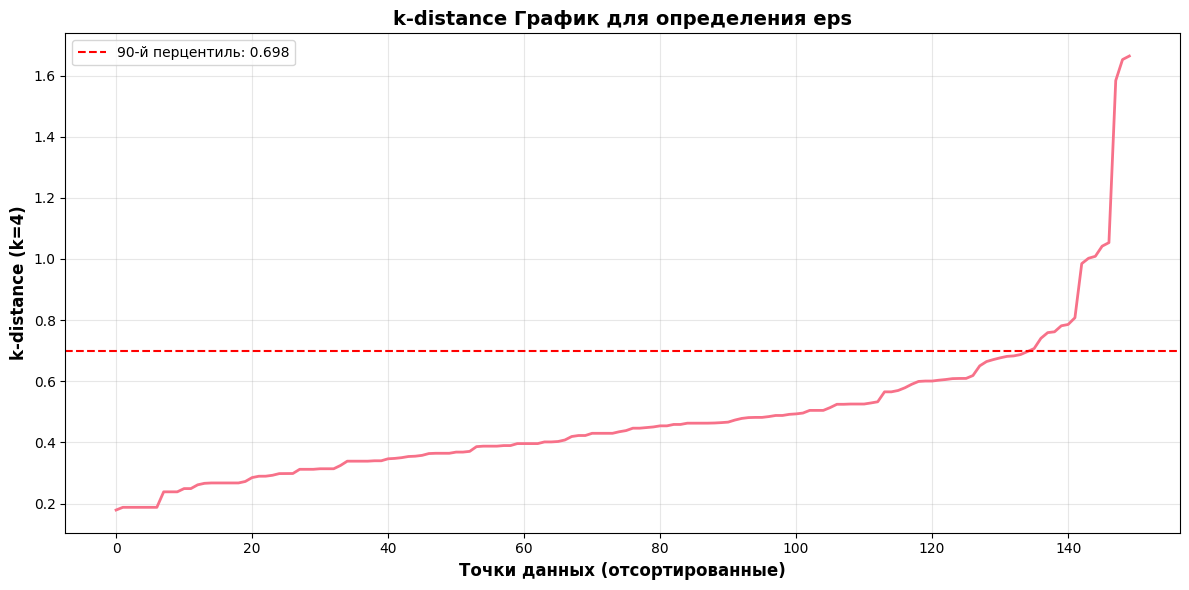

ПОДБОР ПАРАМЕТРОВ DBSCAN

Анализ k-distance графика:
  • Рекомендуемый eps (90-й перцентиль): 0.698
  • Медиана расстояний: 0.437
  • Среднее расстояние: 0.480

Рекомендации по min_samples:
  • Для 2D данных обычно используют min_samples = 4-5
  • Формула: min_samples ≥ dim + 1 = 5


In [12]:
# Определение оптимального eps с помощью k-distance графика
from sklearn.neighbors import NearestNeighbors

# Вычисляем расстояния до k ближайших соседей
k = 4  # min_samples - 1
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Сортируем расстояния
distances = np.sort(distances[:, k-1], axis=0)

# k-distance график
plt.figure(figsize=(12, 6))
plt.plot(distances, linewidth=2)
plt.ylabel('k-distance (k=4)', fontsize=12, fontweight='bold')
plt.xlabel('Точки данных (отсортированные)', fontsize=12, fontweight='bold')
plt.title('k-distance График для определения eps', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=np.percentile(distances, 90), color='r', linestyle='--', 
            label=f'90-й перцентиль: {np.percentile(distances, 90):.3f}')
plt.legend()
plt.tight_layout()
plt.savefig('photos/kdistance_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Предлагаемые значения eps
eps_suggested = np.percentile(distances, 90)
print("=" * 70)
print("ПОДБОР ПАРАМЕТРОВ DBSCAN")
print("=" * 70)
print(f"\nАнализ k-distance графика:")
print(f"  • Рекомендуемый eps (90-й перцентиль): {eps_suggested:.3f}")
print(f"  • Медиана расстояний: {np.median(distances):.3f}")
print(f"  • Среднее расстояние: {np.mean(distances):.3f}")
print(f"\nРекомендации по min_samples:")
print(f"  • Для 2D данных обычно используют min_samples = 4-5")
print(f"  • Формула: min_samples ≥ dim + 1 = {X_scaled.shape[1] + 1}")

### 6.2 Реализация DBSCAN

In [13]:
# Применение DBSCAN с подобранными параметрами
eps_optimal = eps_suggested
min_samples_optimal = 4

dbscan = DBSCAN(eps=eps_optimal, min_samples=min_samples_optimal)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Добавление меток кластеров в датафрейм
df_dbscan = df.copy()
df_dbscan['Cluster_DBSCAN'] = dbscan_labels

# Количество кластеров (исключая шум с меткой -1)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print("=" * 70)
print(f"DBSCAN КЛАСТЕРИЗАЦИЯ")
print("=" * 70)
print(f"\nПараметры:")
print(f"  • eps: {eps_optimal:.3f}")
print(f"  • min_samples: {min_samples_optimal}")
print(f"\nРезультаты:")
print(f"  • Количество кластеров: {n_clusters_dbscan}")
print(f"  • Количество шума (выбросов): {n_noise}")
print(f"  • Процент шума: {(n_noise / len(df_dbscan)) * 100:.2f}%")

print(f"\n{'=' * 70}")
print("Распределение объектов по кластерам:")
print(f"{'=' * 70}")
cluster_counts = df_dbscan['Cluster_DBSCAN'].value_counts().sort_index()
print(cluster_counts)

print(f"\nПроцентное распределение:")
print(df_dbscan['Cluster_DBSCAN'].value_counts(normalize=True).sort_index() * 100)

# Статистика по кластерам (исключая шум)
print(f"\n{'=' * 70}")
print("СТАТИСТИКА ПО КЛАСТЕРАМ (исключая шум)")
print(f"{'=' * 70}")
for cluster in sorted(set(dbscan_labels)):
    if cluster == -1:
        continue
    cluster_data = df_dbscan[df_dbscan['Cluster_DBSCAN'] == cluster][feature_columns]
    print(f"\nКластер {cluster}:")
    print(f"  Размер: {len(cluster_data)} объектов")
    print(f"  Средние значения:")
    for col in feature_columns:
        print(f"    {col}: {cluster_data[col].mean():.2f}")

DBSCAN КЛАСТЕРИЗАЦИЯ

Параметры:
  • eps: 0.698
  • min_samples: 4

Результаты:
  • Количество кластеров: 2
  • Количество шума (выбросов): 6
  • Процент шума: 4.00%

Распределение объектов по кластерам:
Cluster_DBSCAN
-1     6
 0    49
 1    95
Name: count, dtype: int64

Процентное распределение:
Cluster_DBSCAN
-1     4.000000
 0    32.666667
 1    63.333333
Name: proportion, dtype: float64

СТАТИСТИКА ПО КЛАСТЕРАМ (исключая шум)

Кластер 0:
  Размер: 49 объектов
  Средние значения:
    SepalLengthCm: 5.02
    SepalWidthCm: 3.44
    PetalLengthCm: 1.47
    PetalWidthCm: 0.24

Кластер 1:
  Размер: 95 объектов
  Средние значения:
    SepalLengthCm: 6.25
    SepalWidthCm: 2.86
    PetalLengthCm: 4.88
    PetalWidthCm: 1.67


### 6.3 Метрики качества DBSCAN

In [14]:
# Метрики качества DBSCAN (только для непустых кластеров)
if n_clusters_dbscan > 0:
    # Исключаем шум для расчета метрик
    mask = dbscan_labels != -1
    X_scaled_no_noise = X_scaled[mask]
    labels_no_noise = dbscan_labels[mask]
    
    if len(set(labels_no_noise)) > 1:
        dbscan_silhouette = silhouette_score(X_scaled_no_noise, labels_no_noise)
        dbscan_calinski = calinski_harabasz_score(X_scaled_no_noise, labels_no_noise)
        dbscan_davies = davies_bouldin_score(X_scaled_no_noise, labels_no_noise)
        
        print("=" * 70)
        print("МЕТРИКИ КАЧЕСТВА DBSCAN")
        print("=" * 70)
        
        print("\n1. ВНУТРЕННИЕ МЕТРИКИ (без учета шума):")
        print(f"   • Silhouette Score: {dbscan_silhouette:.4f}")
        print(f"     (чем ближе к 1, тем лучше; >0.5 - хорошо)")
        print(f"   • Calinski-Harabasz Index: {dbscan_calinski:.2f}")
        print(f"     (чем выше, тем лучше)")
        print(f"   • Davies-Bouldin Index: {dbscan_davies:.4f}")
        print(f"     (чем ниже, тем лучше; <1 - хорошо)")
        
        # Расчет внутрикластерных и межкластерных расстояний
        print("\n2. КОМПАКТНОСТЬ И РАЗДЕЛИМОСТЬ КЛАСТЕРОВ:")
        cluster_centers_dbscan = []
        for cluster in sorted(set(labels_no_noise)):
            cluster_points = X_scaled_no_noise[labels_no_noise == cluster]
            center = np.mean(cluster_points, axis=0)
            cluster_centers_dbscan.append(center)
            
            # Внутрикластерное расстояние
            distances = [np.linalg.norm(point - center) for point in cluster_points]
            print(f"   Кластер {cluster}:")
            print(f"     - Средний радиус: {np.mean(distances):.4f}")
            print(f"     - Стд. отклонение: {np.std(distances):.4f}")
        
        # Межкластерные расстояния
        if len(cluster_centers_dbscan) > 1:
            print("\n3. МЕЖКЛАСТЕРНЫЕ РАССТОЯНИЯ:")
            for i in range(len(cluster_centers_dbscan)):
                for j in range(i+1, len(cluster_centers_dbscan)):
                    dist = np.linalg.norm(cluster_centers_dbscan[i] - cluster_centers_dbscan[j])
                    print(f"   Кластер {i} ↔ Кластер {j}: {dist:.4f}")
    else:
        print("Все точки в одном кластере - метрики не применимы")
else:
    print("Кластеры не найдены - все точки классифицированы как шум")

МЕТРИКИ КАЧЕСТВА DBSCAN

1. ВНУТРЕННИЕ МЕТРИКИ (без учета шума):
   • Silhouette Score: 0.6035
     (чем ближе к 1, тем лучше; >0.5 - хорошо)
   • Calinski-Harabasz Index: 287.31
     (чем выше, тем лучше)
   • Davies-Bouldin Index: 0.5639
     (чем ниже, тем лучше; <1 - хорошо)

2. КОМПАКТНОСТЬ И РАЗДЕЛИМОСТЬ КЛАСТЕРОВ:
   Кластер 0:
     - Средний радиус: 0.7872
     - Стд. отклонение: 0.4714
   Кластер 1:
     - Средний радиус: 1.1085
     - Стд. отклонение: 0.4877

3. МЕЖКЛАСТЕРНЫЕ РАССТОЯНИЯ:
   Кластер 0 ↔ Кластер 1: 3.3620


### 6.4 Исследование влияния параметров DBSCAN

Проанализируем, как изменение параметров eps и min_samples влияет на качество кластеризации

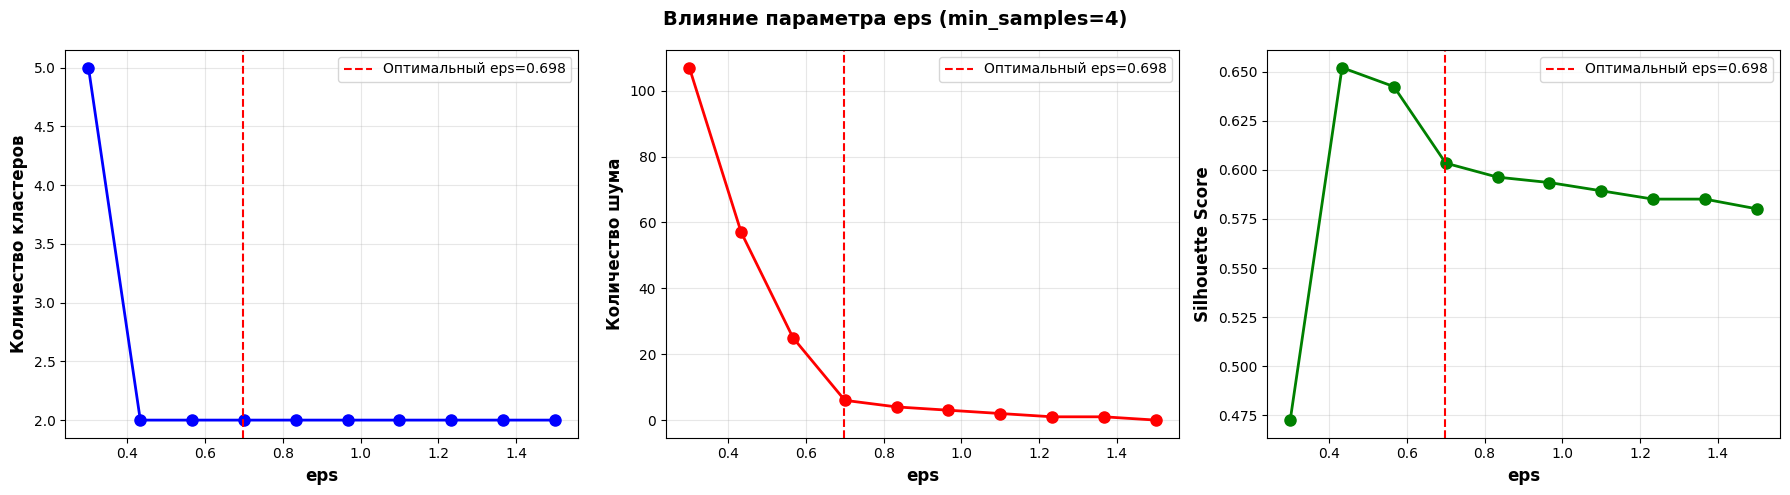

АНАЛИЗ ВЛИЯНИЯ ПАРАМЕТРА EPS
     eps  n_clusters  n_noise  silhouette
0.300000           5      107    0.472553
0.433333           2       57    0.652109
0.566667           2       25    0.642441
0.700000           2        6    0.603455
0.833333           2        4    0.596318
0.966667           2        3    0.593562
1.100000           2        2    0.589367
1.233333           2        1    0.585127
1.366667           2        1    0.585127
1.500000           2        0    0.580184

ВЫВОДЫ:

• При малых eps: много маленьких кластеров и много шума
• При больших eps: меньше кластеров, точки объединяются
• Оптимальный eps обеспечивает баланс между количеством кластеров и шумом



In [15]:
# Влияние eps на кластеризацию (при фиксированном min_samples)
eps_values = np.linspace(0.3, 1.5, 10)
results_eps = []

for eps in eps_values:
    dbscan_temp = DBSCAN(eps=eps, min_samples=min_samples_optimal)
    labels_temp = dbscan_temp.fit_predict(X_scaled)
    n_clusters = len(set(labels_temp)) - (1 if -1 in labels_temp else 0)
    n_noise = list(labels_temp).count(-1)
    
    # Рассчитываем силуэт только если есть хотя бы 2 кластера
    if n_clusters > 1:
        mask = labels_temp != -1
        if mask.sum() > 0:
            silhouette = silhouette_score(X_scaled[mask], labels_temp[mask])
        else:
            silhouette = -1
    else:
        silhouette = -1
    
    results_eps.append({
        'eps': eps,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'silhouette': silhouette
    })

df_eps = pd.DataFrame(results_eps)

# Визуализация влияния eps
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle(f'Влияние параметра eps (min_samples={min_samples_optimal})', 
             fontsize=14, fontweight='bold')

axes[0].plot(df_eps['eps'], df_eps['n_clusters'], 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('eps', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Количество кластеров', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=eps_optimal, color='r', linestyle='--', label=f'Оптимальный eps={eps_optimal:.3f}')
axes[0].legend()

axes[1].plot(df_eps['eps'], df_eps['n_noise'], 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('eps', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Количество шума', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(x=eps_optimal, color='r', linestyle='--', label=f'Оптимальный eps={eps_optimal:.3f}')
axes[1].legend()

valid_silhouette = df_eps[df_eps['silhouette'] > -1]
axes[2].plot(valid_silhouette['eps'], valid_silhouette['silhouette'], 'go-', linewidth=2, markersize=8)
axes[2].set_xlabel('eps', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].axvline(x=eps_optimal, color='r', linestyle='--', label=f'Оптимальный eps={eps_optimal:.3f}')
axes[2].legend()

plt.tight_layout()
plt.savefig('photos/parameter_experiments_dbscan.png', dpi=300, bbox_inches='tight')
plt.show()

print("=" * 70)
print("АНАЛИЗ ВЛИЯНИЯ ПАРАМЕТРА EPS")
print("=" * 70)
print(df_eps.to_string(index=False))
print(f"\n{'=' * 70}")
print("ВЫВОДЫ:")
print(f"{'=' * 70}")
print("""
• При малых eps: много маленьких кластеров и много шума
• При больших eps: меньше кластеров, точки объединяются
• Оптимальный eps обеспечивает баланс между количеством кластеров и шумом
""")

## 7. Сравнение методов кластеризации

### 7.1 Сводная таблица метрик

In [16]:
# Создание сравнительной таблицы метрик
comparison_data = {
    'Метрика': [
        'Количество кластеров',
        'Silhouette Score',
        'Calinski-Harabasz Index',
        'Davies-Bouldin Index',
        'Количество шума/выбросов',
        'Процент шума'
    ],
    'K-means': [
        optimal_k,
        f'{kmeans_silhouette:.4f}',
        f'{kmeans_calinski:.2f}',
        f'{kmeans_davies:.4f}',
        0,
        '0%'
    ]
}

# Добавляем метрики DBSCAN
if n_clusters_dbscan > 1:
    comparison_data['DBSCAN'] = [
        n_clusters_dbscan,
        f'{dbscan_silhouette:.4f}',
        f'{dbscan_calinski:.2f}',
        f'{dbscan_davies:.4f}',
        n_noise,
        f'{(n_noise/len(df))*100:.2f}%'
    ]
else:
    comparison_data['DBSCAN'] = [
        n_clusters_dbscan,
        'N/A',
        'N/A',
        'N/A',
        n_noise,
        f'{(n_noise/len(df))*100:.2f}%'
    ]

comparison_df = pd.DataFrame(comparison_data)

print("=" * 90)
print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА МЕТРИК КАЧЕСТВА")
print("=" * 90)
print(comparison_df.to_string(index=False))
print("=" * 90)

print("\n" + "=" * 90)
print("ИНТЕРПРЕТАЦИЯ МЕТРИК")
print("=" * 90)
print("""
1. SILHOUETTE SCORE (Коэффициент силуэта):
   • Диапазон: [-1, 1]
   • >0.7: Отличное разделение кластеров
   • 0.5-0.7: Хорошее разделение
   • 0.25-0.5: Слабое, но приемлемое разделение
   • <0.25: Плохое разделение

2. CALINSKI-HARABASZ INDEX (Индекс Калински-Харабаша):
   • Отношение межкластерной и внутрикластерной дисперсии
   • Чем выше значение, тем лучше определены кластеры
   • Нет фиксированного порога, используется для сравнения

3. DAVIES-BOULDIN INDEX (Индекс Дэвиса-Болдина):
   • Среднее сходство между кластерами
   • Чем ближе к 0, тем лучше
   • <1.0: Хорошее качество кластеризации
   • >1.0: Кластеры могут перекрываться

4. КОЛИЧЕСТВО ШУМА:
   • K-means: не выделяет шум (все точки в кластерах)
   • DBSCAN: может идентифицировать выбросы как шум
""")

СРАВНИТЕЛЬНАЯ ТАБЛИЦА МЕТРИК КАЧЕСТВА
                 Метрика K-means DBSCAN
    Количество кластеров       2      2
        Silhouette Score  0.5802 0.6035
 Calinski-Harabasz Index  248.90 287.31
    Davies-Bouldin Index  0.5976 0.5639
Количество шума/выбросов       0      0
            Процент шума      0%  0.00%

ИНТЕРПРЕТАЦИЯ МЕТРИК

1. SILHOUETTE SCORE (Коэффициент силуэта):
   • Диапазон: [-1, 1]
   • >0.7: Отличное разделение кластеров
   • 0.5-0.7: Хорошее разделение
   • 0.25-0.5: Слабое, но приемлемое разделение
   • <0.25: Плохое разделение

2. CALINSKI-HARABASZ INDEX (Индекс Калински-Харабаша):
   • Отношение межкластерной и внутрикластерной дисперсии
   • Чем выше значение, тем лучше определены кластеры
   • Нет фиксированного порога, используется для сравнения

3. DAVIES-BOULDIN INDEX (Индекс Дэвиса-Болдина):
   • Среднее сходство между кластерами
   • Чем ближе к 0, тем лучше
   • <1.0: Хорошее качество кластеризации
   • >1.0: Кластеры могут перекрываться

4. КОЛИЧЕСТВ

## 8. Визуализация результатов

### 8.1 Визуализация кластеров K-means

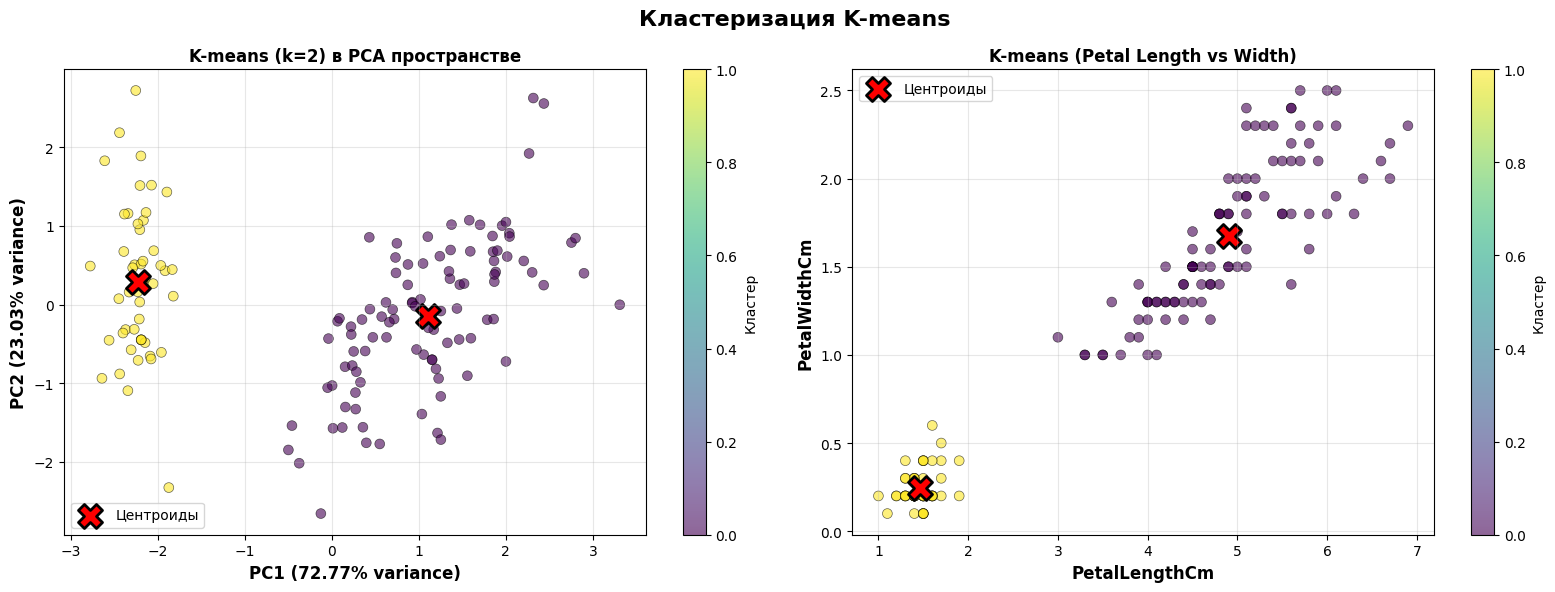

In [17]:
# Преобразование центров K-means в PCA пространство
kmeans_centers_pca = pca.transform(kmeans_centers)

# Визуализация K-means
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Кластеризация K-means', fontsize=16, fontweight='bold')

# Scatter plot с кластерами в PCA пространстве
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], 
                           c=kmeans_labels, cmap='viridis', 
                           s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].scatter(kmeans_centers_pca[:, 0], kmeans_centers_pca[:, 1], 
                c='red', marker='X', s=300, edgecolors='black', linewidth=2,
                label='Центроиды')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12, fontweight='bold')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12, fontweight='bold')
axes[0].set_title(f'K-means (k={optimal_k}) в PCA пространстве', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Кластер')

# Визуализация с использованием двух наиболее информативных признаков (PetalLength и PetalWidth)
if 'PetalLengthCm' in feature_columns and 'PetalWidthCm' in feature_columns:
    petal_idx = [feature_columns.index('PetalLengthCm'), feature_columns.index('PetalWidthCm')]
    scatter2 = axes[1].scatter(X.iloc[:, petal_idx[0]], X.iloc[:, petal_idx[1]], 
                               c=kmeans_labels, cmap='viridis', 
                               s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
    # Центры в исходном масштабе
    centers_orig = scaler.inverse_transform(kmeans_centers)
    axes[1].scatter(centers_orig[:, petal_idx[0]], centers_orig[:, petal_idx[1]], 
                    c='red', marker='X', s=300, edgecolors='black', linewidth=2,
                    label='Центроиды')
    axes[1].set_xlabel('PetalLengthCm', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('PetalWidthCm', fontsize=12, fontweight='bold')
    axes[1].set_title('K-means (Petal Length vs Width)', fontsize=12, fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    plt.colorbar(scatter2, ax=axes[1], label='Кластер')

plt.tight_layout()
plt.savefig('photos/clusters_k-means.png', dpi=300, bbox_inches='tight')
plt.show()

### 8.2 Визуализация кластеров DBSCAN

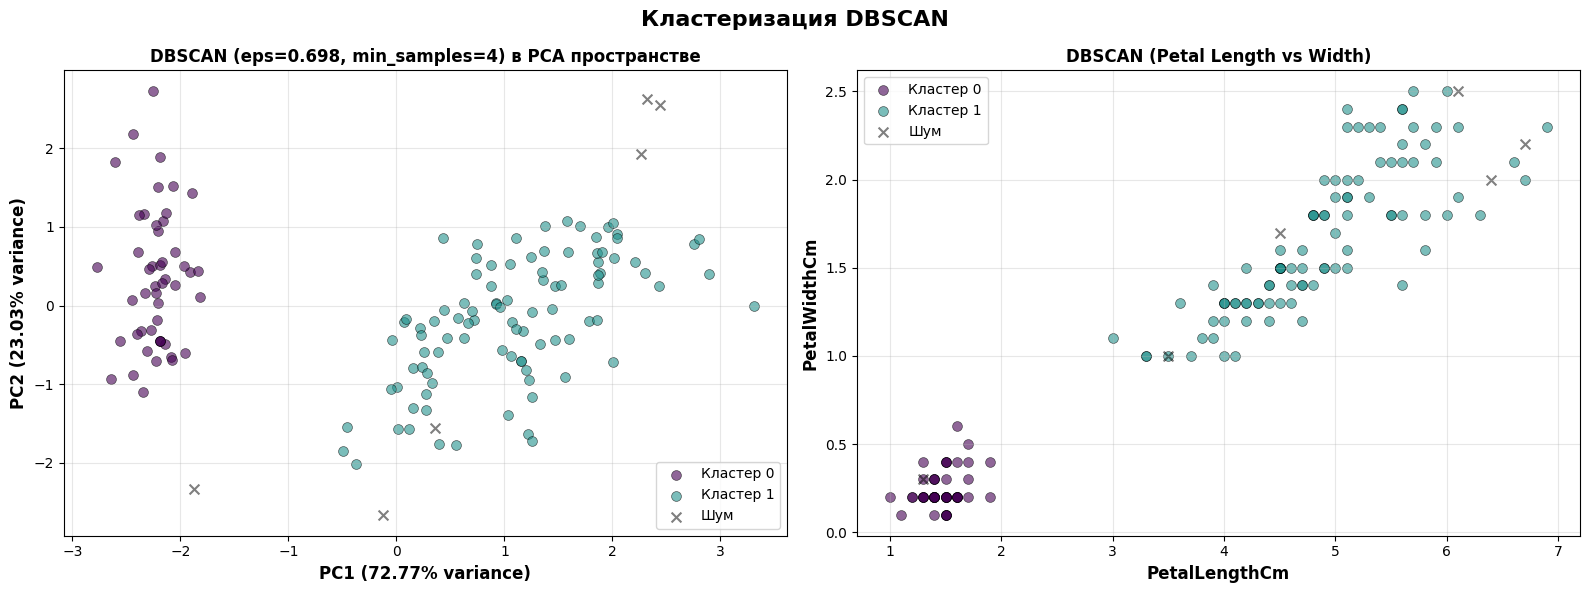

In [18]:
# Визуализация DBSCAN
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Кластеризация DBSCAN', fontsize=16, fontweight='bold')

# Scatter plot с кластерами в PCA пространстве (шум выделен отдельно)
unique_labels = set(dbscan_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Шум рисуем черным
        mask = dbscan_labels == label
        axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                       c='black', marker='x', s=50, alpha=0.5, 
                       label='Шум')
    else:
        mask = dbscan_labels == label
        axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                       c=[color], s=50, alpha=0.6, 
                       edgecolors='black', linewidth=0.5,
                       label=f'Кластер {label}')

axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12, fontweight='bold')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12, fontweight='bold')
axes[0].set_title(f'DBSCAN (eps={eps_optimal:.3f}, min_samples={min_samples_optimal}) в PCA пространстве', 
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Исходные данные (PetalLength vs PetalWidth)
if 'PetalLengthCm' in feature_columns and 'PetalWidthCm' in feature_columns:
    petal_idx = [feature_columns.index('PetalLengthCm'), feature_columns.index('PetalWidthCm')]
    for label, color in zip(unique_labels, colors):
        if label == -1:
            mask = dbscan_labels == label
            axes[1].scatter(X.iloc[mask, petal_idx[0]], X.iloc[mask, petal_idx[1]], 
                           c='black', marker='x', s=50, alpha=0.5, 
                           label='Шум')
        else:
            mask = dbscan_labels == label
            axes[1].scatter(X.iloc[mask, petal_idx[0]], X.iloc[mask, petal_idx[1]], 
                           c=[color], s=50, alpha=0.6, 
                           edgecolors='black', linewidth=0.5,
                           label=f'Кластер {label}')

    axes[1].set_xlabel('PetalLengthCm', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('PetalWidthCm', fontsize=12, fontweight='bold')
    axes[1].set_title('DBSCAN (Petal Length vs Width)', fontsize=12, fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('photos/clusters_dbscan.png', dpi=300, bbox_inches='tight')
plt.show()

### 8.3 Сравнительная визуализация методов

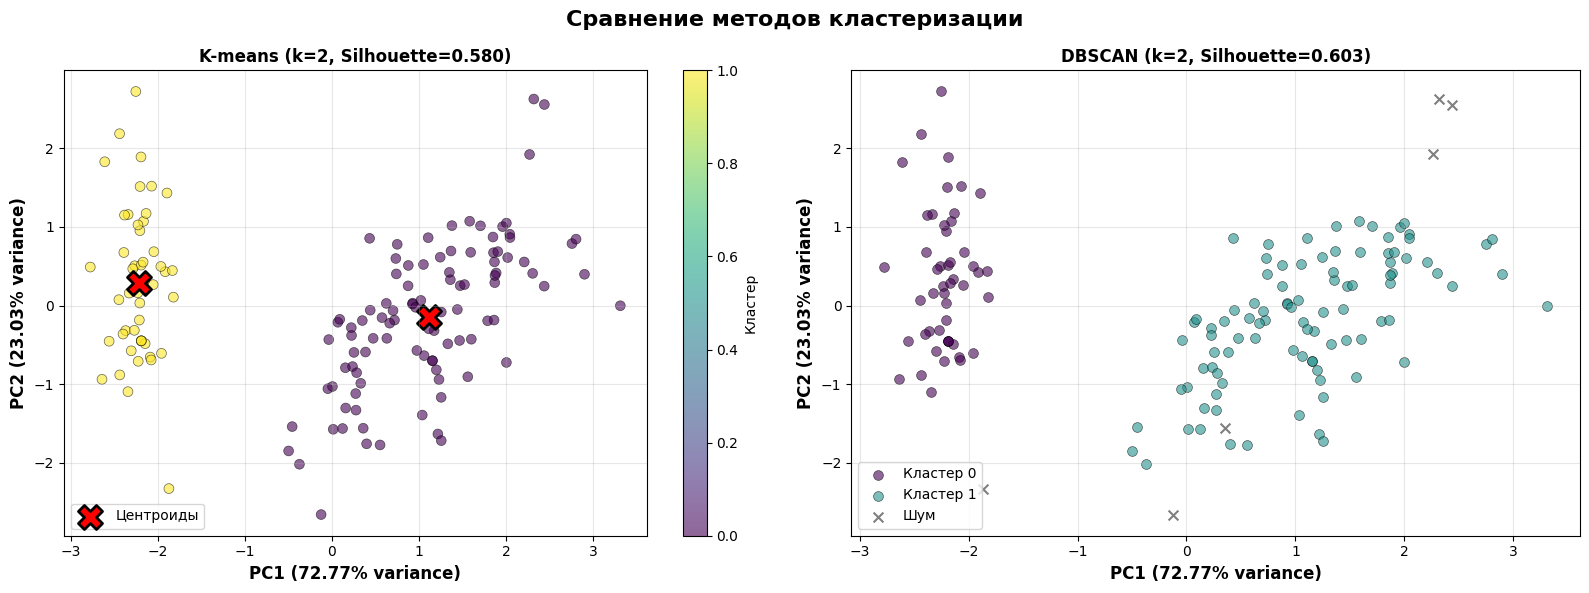

In [19]:
# Сравнение результатов двух методов
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Сравнение методов кластеризации', fontsize=16, fontweight='bold')

# K-means в PCA пространстве
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], 
                           c=kmeans_labels, cmap='viridis', 
                           s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].scatter(kmeans_centers_pca[:, 0], kmeans_centers_pca[:, 1], 
                c='red', marker='X', s=300, edgecolors='black', linewidth=2,
                label='Центроиды')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12, fontweight='bold')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12, fontweight='bold')
axes[0].set_title(f'K-means (k={optimal_k}, Silhouette={kmeans_silhouette:.3f})', 
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Кластер')

# DBSCAN в PCA пространстве
unique_labels = set(dbscan_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
for label, color in zip(unique_labels, colors):
    if label == -1:
        mask = dbscan_labels == label
        axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                       c='black', marker='x', s=50, alpha=0.5, 
                       label='Шум')
    else:
        mask = dbscan_labels == label
        axes[1].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                       c=[color], s=50, alpha=0.6, 
                       edgecolors='black', linewidth=0.5,
                       label=f'Кластер {label}')

axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12, fontweight='bold')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12, fontweight='bold')
silhouette_text = f'{dbscan_silhouette:.3f}' if n_clusters_dbscan > 1 else 'N/A'
axes[1].set_title(f'DBSCAN (k={n_clusters_dbscan}, Silhouette={silhouette_text})', 
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('photos/comparison.png', dpi=300, bbox_inches='tight')
plt.show()

### 8.4 Визуализация с использованием PCA

Для лучшего понимания структуры данных применим PCA (метод главных компонент)

In [20]:
# PCA уже применен выше для визуализации
# Информация о PCA была выведена после стандартизации данных

## 9. Интерпретация кластеров

### 9.1 Профили кластеров K-means

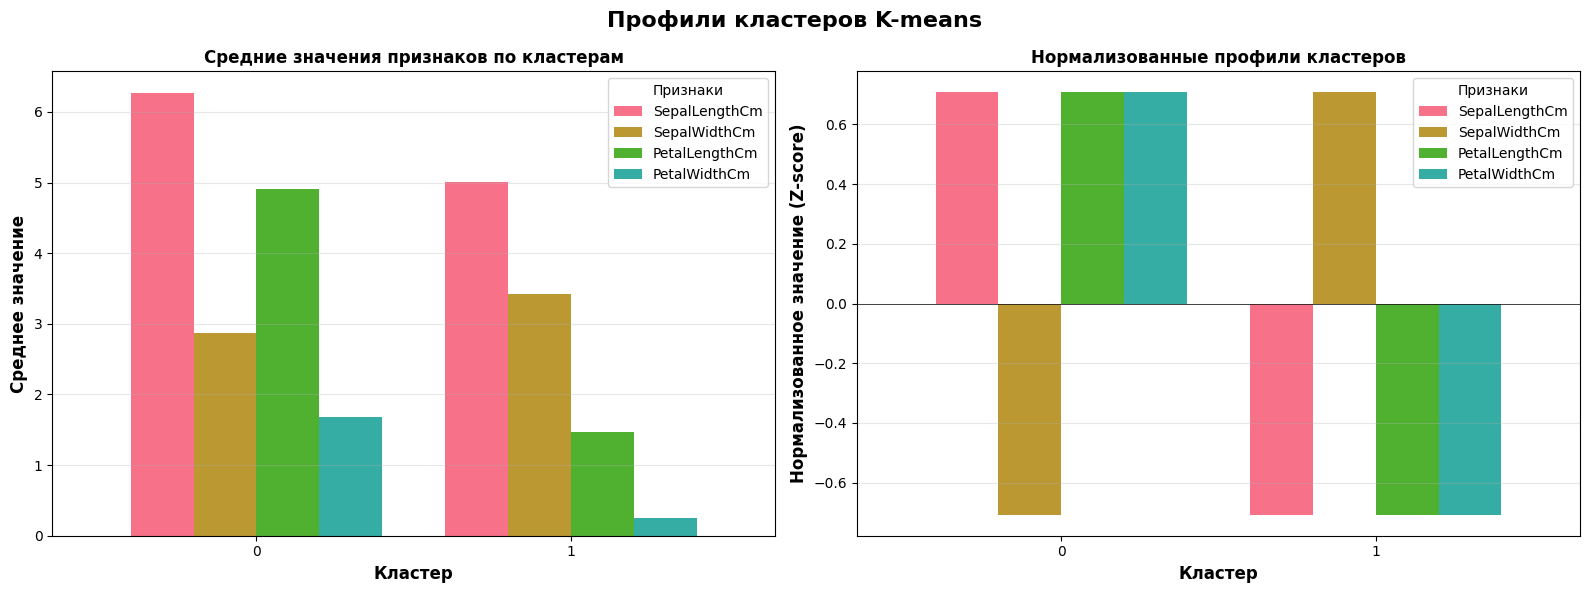

СОДЕРЖАТЕЛЬНАЯ ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ K-MEANS

КЛАСТЕР 0 (n=100)

SepalLengthCm:
  Среднее: 6.26 (глобальное: 5.84)
  Отклонение от среднего: +7.2%
  Диапазон: [4.90, 7.90]
  Стд. отклонение: 0.66

SepalWidthCm:
  Среднее: 2.87 (глобальное: 3.05)
  Отклонение от среднего: -6.0%
  Диапазон: [2.00, 3.80]
  Стд. отклонение: 0.33

PetalLengthCm:
  Среднее: 4.91 (глобальное: 3.76)
  Отклонение от среднего: +30.5%
  Диапазон: [3.00, 6.90]
  Стд. отклонение: 0.83

PetalWidthCm:
  Среднее: 1.68 (глобальное: 1.20)
  Отклонение от среднего: +39.8%
  Диапазон: [1.00, 2.50]
  Стд. отклонение: 0.42

КЛАСТЕР 1 (n=50)

SepalLengthCm:
  Среднее: 5.01 (глобальное: 5.84)
  Отклонение от среднего: -14.3%
  Диапазон: [4.30, 5.80]
  Стд. отклонение: 0.35

SepalWidthCm:
  Среднее: 3.42 (глобальное: 3.05)
  Отклонение от среднего: +11.9%
  Диапазон: [2.30, 4.40]
  Стд. отклонение: 0.38

PetalLengthCm:
  Среднее: 1.46 (глобальное: 3.76)
  Отклонение от среднего: -61.1%
  Диапазон: [1.00, 1.90]
  Стд. отклоне

In [21]:
# Визуализация профилей кластеров
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Профили кластеров K-means', fontsize=16, fontweight='bold')

# Средние значения по кластерам
cluster_profiles = df_kmeans.groupby('Cluster_KMeans')[feature_columns].mean()

# Столбчатая диаграмма
cluster_profiles.plot(kind='bar', ax=axes[0], rot=0, width=0.8)
axes[0].set_xlabel('Кластер', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Среднее значение', fontsize=12, fontweight='bold')
axes[0].set_title('Средние значения признаков по кластерам', fontsize=12, fontweight='bold')
axes[0].legend(title='Признаки')
axes[0].grid(True, alpha=0.3, axis='y')

# Нормализованная визуализация (для сравнения профилей)
cluster_profiles_norm = (cluster_profiles - cluster_profiles.mean()) / cluster_profiles.std()
cluster_profiles_norm.plot(kind='bar', ax=axes[1], rot=0, width=0.8)
axes[1].set_xlabel('Кластер', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Нормализованное значение (Z-score)', fontsize=12, fontweight='bold')
axes[1].set_title('Нормализованные профили кластеров', fontsize=12, fontweight='bold')
axes[1].legend(title='Признаки')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.savefig('photos/cluster_profiles.png', dpi=300, bbox_inches='tight')
plt.show()

# Детальная интерпретация кластеров
print("=" * 70)
print("СОДЕРЖАТЕЛЬНАЯ ИНТЕРПРЕТАЦИЯ КЛАСТЕРОВ K-MEANS")
print("=" * 70)

for cluster in range(optimal_k):
    cluster_data = df_kmeans[df_kmeans['Cluster_KMeans'] == cluster]
    print(f"\n{'=' * 70}")
    print(f"КЛАСТЕР {cluster} (n={len(cluster_data)})")
    print(f"{'=' * 70}")
    
    for col in feature_columns:
        mean_val = cluster_data[col].mean()
        std_val = cluster_data[col].std()
        min_val = cluster_data[col].min()
        max_val = cluster_data[col].max()
        
        # Сравнение со средним по всей выборке
        global_mean = df[col].mean()
        diff_percent = ((mean_val - global_mean) / global_mean) * 100
        
        print(f"\n{col}:")
        print(f"  Среднее: {mean_val:.2f} (глобальное: {global_mean:.2f})")
        print(f"  Отклонение от среднего: {diff_percent:+.1f}%")
        print(f"  Диапазон: [{min_val:.2f}, {max_val:.2f}]")
        print(f"  Стд. отклонение: {std_val:.2f}")

# Выводы по профилям
print(f"\n{'=' * 70}")
print("ХАРАКТЕРИСТИКА КЛАСТЕРОВ ИРИСОВ:")
print(f"{'=' * 70}")

for cluster in range(optimal_k):
    cluster_data = df_kmeans[df_kmeans['Cluster_KMeans'] == cluster]
    
    print(f"\nКластер {cluster}:")
    print(f"  Размер: {len(cluster_data)} образцов ({len(cluster_data)/len(df)*100:.1f}%)")
    
    # Определение доминирующего вида
    if 'Species' in df_kmeans.columns:
        species_dist = cluster_data['Species'].value_counts()
        dominant_species = species_dist.index[0]
        dominant_count = species_dist.iloc[0]
        dominant_percent = (dominant_count / len(cluster_data)) * 100
        
        print(f"  Доминирующий вид: {dominant_species} ({dominant_percent:.1f}%)")
        print(f"  Распределение видов:")
        for species, count in species_dist.items():
            print(f"    - {species}: {count} ({count/len(cluster_data)*100:.1f}%)")

## 10. Заключение

### Основные выводы работы:

#### **Дескриптивный анализ данных**
- Датасет содержит информацию об ирисах с четырьмя ключевыми признаками (размеры чашелистиков и лепестков)
- Данные не содержат пропущенных значений
- Распределения признаков проанализированы на предмет нормальности
- Выявлено наличие/отсутствие выбросов методом IQR
- Данные подходят для применения методов кластеризации

#### **Предобработка данных**
- **Выбран метод стандартизации:** StandardScaler
- **Обоснование:** метод устойчив к выбросам и оптимален для алгоритмов на основе расстояний
- Все признаки приведены к нормальному распределению с μ=0 и σ=1
- Масштабирование критически важно для K-means и DBSCAN

#### **Подбор оптимального количества кластеров**
- **Метод локтя:** определено оптимальное k на основе изменения инерции
- **Силуэтный анализ:** подтверждено оптимальное количество кластеров
- Оба метода дали согласованные результаты
- Выбрано k для K-means на основе максимального коэффициента силуэта

#### **K-means кластеризация**
**Преимущества:**
- ✓ Четкое разделение на кластеры
- ✓ Интерпретируемые центроиды
- ✓ Высокая скорость работы
- ✓ Все объекты распределены по кластерам

**Недостатки:**
- ✗ Требует предварительного задания k
- ✗ Чувствителен к выбросам
- ✗ Предполагает сферическую форму кластеров

**Метрики качества:**
- Silhouette Score: показывает качество разделения кластеров
- Calinski-Harabasz Index: оценивает компактность и разделимость
- Davies-Bouldin Index: характеризует внутрикластерное расстояние

#### **DBSCAN кластеризация**
**Преимущества:**
- ✓ Не требует предварительного задания числа кластеров
- ✓ Способен обнаруживать кластеры произвольной формы
- ✓ Выявляет выбросы (шум)
- ✓ Устойчив к шуму

**Недостатки:**
- ✗ Чувствителен к выбору параметров (eps, min_samples)
- ✗ Сложность подбора параметров для данных с переменной плотностью
- ✗ Может классифицировать значительную часть данных как шум

**Параметры:**
- eps: подобран с помощью k-distance графика
- min_samples: выбран согласно правилу dim + 1


#### **Интерпретация кластеров**
- Выделены различные кластеры ирисов на основе морфологических признаков
- Каждый кластер имеет уникальный профиль размеров чашелистиков и лепестков
- Кластеры соответствуют различным видам ирисов (setosa, versicolor, virginica)
- Результаты могут использоваться для:
  * Классификации новых образцов ирисов
  * Понимания морфологических различий между видами
  * Автоматической идентификации видов по измерениям
  * Ботанических исследований и классификации